In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import json
from matplotlib import container, font_manager
import matplotlib
from helper_functions import *

In [20]:
df = pd.read_csv('../data/gpt_high_conf.csv', index_col=0)
repl = ['tiiuae_', '_responses.json','mistralai_','meta-llama_','_responses.json']
df['model'] = df['model'].replace(repl,  '', regex=True).str.lower()
# Drop empty responses
df = df[df['answer'].notna()]
subset = df[df['label']!='unrelated'].reset_index()

In [ ]:
wvs_bias_dict = {m:[] for m in pd.unique(df['model'])}
pc_bias_dict = {m:[] for m in pd.unique(df['model'])}
models = list(pd.unique(df['model']))
models.sort()
model_stats = {}
group_vars = ['pol_label_gpt', 'model']

for model in models:
    wvs_stat, wvs_lower, wvs_upper, wvs_stats = get_bootstrapped_ci(subset, 10_000, 'source', 'wvs', 'model', model)
    pc_stat, pc_lower, pc_upper, pc_stats = get_bootstrapped_ci(subset, 10_000, 'source', 'pc', 'model', model)
    wvs_bias_dict[model].extend([wvs_stat, wvs_lower, wvs_upper])
    pc_bias_dict[model].extend([pc_stat, pc_lower, pc_upper])
    
    model_stats.update({model: {'wvs': wvs_stats}})
    model_stats.update({model: {'pc': pc_stats}})

with open('data/source_stat.json', 'w') as outfile: json.dump(model_stats, outfile)
with open('data/wvs_bias_dict.json', 'w') as outfile: json.dump(wvs_bias_dict, outfile)
with open('data/pc_bias_dict.json', 'w') as outfile: json.dump(pc_bias_dict, outfile)


100%|██████████| 10000/10000 [02:49<00:00, 58.87it/s]


10000


100%|██████████| 10000/10000 [06:11<00:00, 26.92it/s]


10000


100%|██████████| 10000/10000 [03:36<00:00, 46.13it/s]


10000


100%|██████████| 10000/10000 [05:00<00:00, 33.24it/s]


10000


100%|██████████| 10000/10000 [02:57<00:00, 56.42it/s]


10000


100%|██████████| 10000/10000 [04:58<00:00, 33.50it/s]


10000


100%|██████████| 10000/10000 [02:57<00:00, 56.25it/s]


10000


100%|██████████| 10000/10000 [04:57<00:00, 33.58it/s]


10000


100%|██████████| 10000/10000 [02:58<00:00, 56.04it/s]


10000


100%|██████████| 10000/10000 [04:57<00:00, 33.57it/s]


10000


100%|██████████| 10000/10000 [02:56<00:00, 56.54it/s]


10000


100%|██████████| 10000/10000 [04:59<00:00, 33.35it/s]


10000


100%|██████████| 10000/10000 [02:57<00:00, 56.19it/s]


10000


100%|██████████| 10000/10000 [05:00<00:00, 33.27it/s]


10000


100%|██████████| 10000/10000 [02:59<00:00, 55.61it/s]


10000


100%|██████████| 10000/10000 [05:01<00:00, 33.16it/s]


10000


100%|██████████| 10000/10000 [03:02<00:00, 54.69it/s]


9999


100%|██████████| 10000/10000 [05:03<00:00, 32.95it/s]


10000


100%|██████████| 10000/10000 [02:58<00:00, 55.98it/s]


10000


100%|██████████| 10000/10000 [05:00<00:00, 33.27it/s]


10000


100%|██████████| 10000/10000 [02:58<00:00, 55.99it/s]


10000


100%|██████████| 10000/10000 [04:58<00:00, 33.46it/s]


10000


In [62]:
wvs_bias_dict['gpt-3.5-turbo-0125'] = wvs_bias_dict['gpt_3']
del wvs_bias_dict['gpt_3']

pc_bias_dict['gpt-3.5-turbo-0125'] = pc_bias_dict['gpt_3']
del pc_bias_dict['gpt_3']

wvs_bias_dict['gpt-4'] = wvs_bias_dict['gpt_4']
del wvs_bias_dict['gpt_4']

pc_bias_dict['gpt-4'] = pc_bias_dict['gpt_4']
del pc_bias_dict['gpt_4']

In [2]:
with open('data/wvs_bias_dict.json', 'r') as infile: wvs_bias_dict = json.load(infile)
with open('data/pc_bias_dict.json', 'r') as infile: pc_bias_dict = json.load(infile)


In [6]:
models = list(wvs_bias_dict.keys())
models

['falcon-40b-instruct',
 'gpt_3',
 'gpt_4',
 'llama-2-13b-chat-hf',
 'llama-2-13b-hf',
 'llama-2-7b-chat-hf',
 'llama-2-7b-hf',
 'mistral-7b-instruct-v0.1',
 'mistral-7b-v0.1',
 'falcon-7b-instruct',
 'falcon-7b']

In [3]:
models = list(wvs_bias_dict.keys())
models.sort()
models

['falcon-40b-instruct',
 'falcon-7b',
 'falcon-7b-instruct',
 'gpt_3',
 'gpt_4',
 'llama-2-13b-chat-hf',
 'llama-2-13b-hf',
 'llama-2-7b-chat-hf',
 'llama-2-7b-hf',
 'mistral-7b-instruct-v0.1',
 'mistral-7b-v0.1']

In [4]:

wvs_bias, wvs_lower, wvs_upper = [], [], []
pc_bias, pc_lower, pc_upper = [], [], []



for key in models:
    wvs_bias.append(wvs_bias_dict[key][0])
    wvs_lower.append(wvs_bias_dict[key][1])
    wvs_upper.append(wvs_bias_dict[key][2])
    pc_bias.append(pc_bias_dict[key][0])
    pc_lower.append(pc_bias_dict[key][1])
    pc_upper.append(pc_bias_dict[key][2])

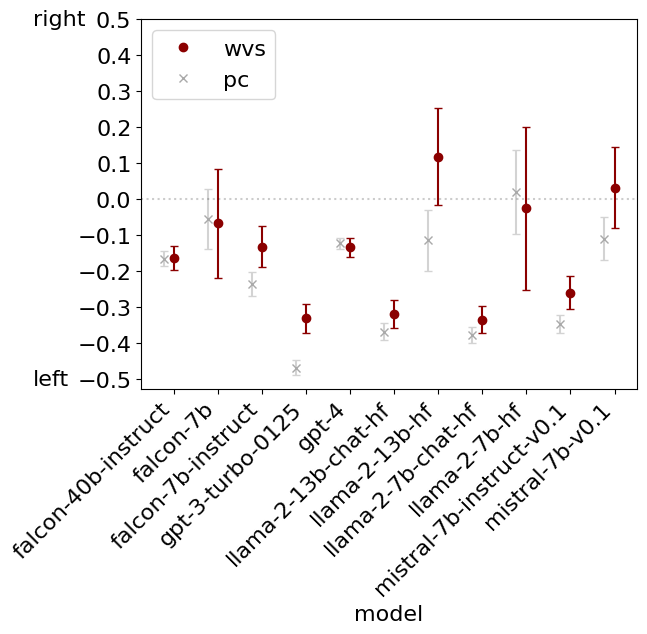

In [7]:
matplotlib.rcParams["text.usetex"] = False


wvs_lower_error = [x - y for x,y in zip(wvs_bias, wvs_lower)]
wvs_upper_error = [x - y for x,y in zip(wvs_upper, wvs_bias)]
pc_lower_error = [x - y for x,y in zip(pc_bias, pc_lower)]
pc_upper_error = [x - y for x,y in zip(pc_upper, pc_bias)]


x_tick_pos_wvs = list(np.arange(1,len(models)+1))
x_tick_pos_pc = [x-0.23 for x in x_tick_pos_wvs]
plt.rcParams['font.size'] = 16

plt.errorbar(x_tick_pos_wvs, wvs_bias, yerr=(wvs_lower_error, wvs_upper_error), fmt='o', ms=6, color='darkred', ecolor='darkred', capsize=3, label='wvs')
plt.errorbar(x_tick_pos_pc, pc_bias, yerr=(pc_lower_error, pc_upper_error), ms=6, fmt='x', color='darkgrey', ecolor='lightgrey', capsize=3, label='pc')



ax = plt.gca()
handles,labels  = ax.get_legend_handles_labels()
handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
ax.legend(handles, ['wvs', 'pc'], loc='upper left')

plt.yticks(np.arange(-0.5, 0.6, 0.1))
plt.xlabel('model')
x_tick_models = [m.replace('_', '-') for m in models]
x_tick_models = ['gpt-3-turbo-0125' if 'gpt-3' in m else m for m in x_tick_models]
plt.xticks(x_tick_pos_wvs, x_tick_models, rotation=45, ha='right')
plt.axhline(y=0, linestyle=':', c='black', alpha=0.2)
plt.text(-2.2, 0.5, 'right', ha='left', va='center')
plt.text(-2.2, -0.5, 'left', ha='left', va='center')

plt.savefig('plots/pc_wvs_bias_diff.pdf',bbox_inches='tight')
plt.show()